In [91]:
import sys
import numpy as np
import pylab as pl
from scipy.stats import linregress
from scipy import stats  as S
%matplotlib inline

sys.path.append("/Users/maithoma/work/github/bsr/analysis/")
sys.path.append("/Users/maithoma/work/github/bsr/experiment/")
sys.path.append("/Users/maithoma/work/github/brainlib/")

#sys.path.append("/Users/maithoma/work/python/")
#from tm_python_lib import *

import Levenshtein
from scipy import stats as S

try:
    reload(bsrAnalysisLib)
    #reload(tasks)
except:
    import bsrAnalysisLib
    #import tasks
    
from bsrAnalysisLib import *
#from tasks import *

rootDir = "/Users/maithoma/work/github/bsr/analysis/"

In [2]:
from tasks import *
articles = ['bigPolluter',
         'emojiShortened',
         'indianFood',
         'marsOneShortened',
         'Ohmconnect',
         'pressFreedomUS']
aDic = getArticlesFromS3()

In [250]:
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','29979','d6dbd','2cd39','85d6e',
          '5f615','94460','b527b','9a02b','74712','46dfb','ad3fb','474f1',
          'b9817','35d1b','251a6','5534e']

allData = {}

for token in tokens:
    J,Jlist = retrieveExperiment(token)
    allData[token] = {'J':J,'Jlist' : Jlist}

    


KeyboardInterrupt: 

In [253]:
allData = json.loads(open(rootDir + "allData.json", "rb").read())

In [259]:
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','2cd39',
          '94460','b527b','9a02b','74712','46dfb','ad3fb',
          '474f1','b9817','35d1b','251a6','5534e']

In [52]:
age = []
for token in tokens:
    
    try:
        response = allData[token]['J']['finalQ']['2']['response']
        #print type(response),response
        
        if isinstance(response,unicode):
            age = np.append(age,int(response))
        elif isinstance(response,dict):
            age = np.append(age,int(response['choices']))
    except:
        print token, " not found"
        continue
        
females = len(age[age==1]) + 1        
males = len(age[age==2]) + 2

8db55  not found
68cdc  not found
94460  not found


7


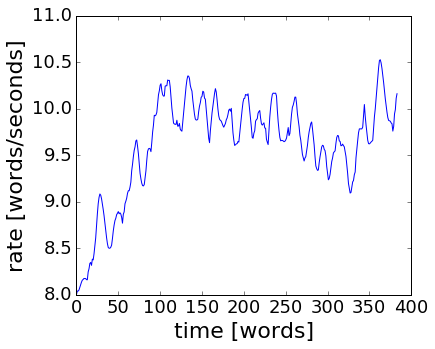

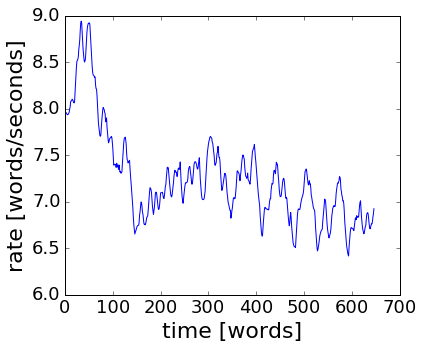

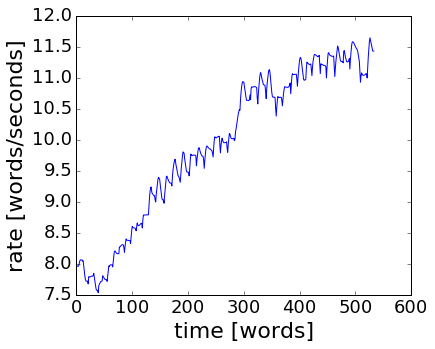

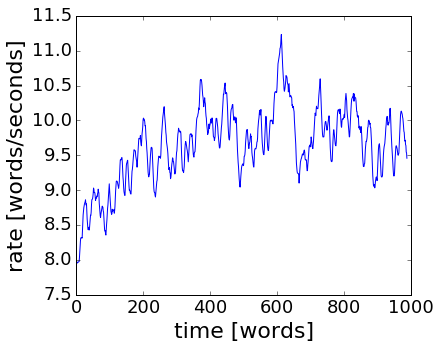

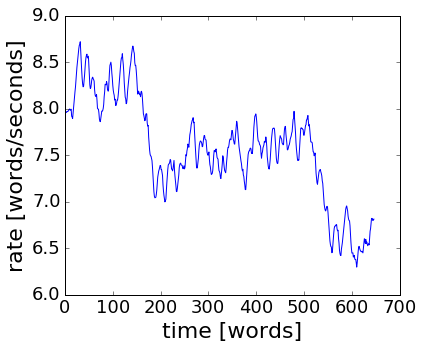

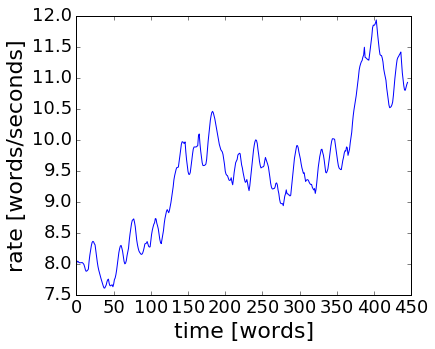

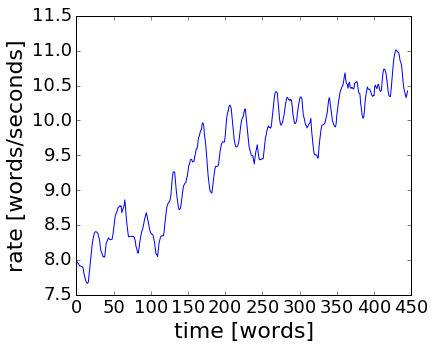

In [284]:
threshold = 2
burn = 100
k=0

Subject = []
Treatment = []
Metric = []

mDiffRate = []

for i,token in enumerate(tokens[:]):
    J = allData[token]['J']
    Jlist = allData[token]['Jlist']
    
    #for treatment in [5,6,7,8]:
    for treatment in ['5','6','7','8']:

        
        if not Jlist[treatment][3:] in ["RSVP_bsrPlus","RSVP_bsrMinus"]:
            continue
        
        
        rate = 1./np.array(J[Jlist[treatment]]['exp']['rate'])
        dRate = np.diff(rate)
        
        if (min(rate) < 1/0.174 or max(rate) > 1./0.031):
            continue
        
        #print token,Jlist[treatment][3:],len(dRate)
        #print " all words : mean : %.4f, std: %.4f"%(np.mean(dRate),np.std(dRate))
        #print " words (> 50): mean : %.4f, std: %.4f"%(np.mean(dRate[burn:]),np.std(dRate[burn:]))
        
           
        mDiffRate = np.append(meandRate,np.mean(dRate))

        iMin = np.argmin(rate)
        iMax = np.argmax(rate)
        
        
        
        m0 = max(rate) - min(rate)
        m1 = (max(rate) - min(rate))/len(rate)
        m2 = (rate[-1] - rate[0])/len(rate)
        m3 = (max(rate) - min(rate))*np.abs(iMax - iMin)/len(rate)
        
        metric = m3
        
        Subject = np.append(Subject,token)
        Treatment = np.append(Treatment,Jlist[treatment][3:])
        Metric = np.append(Metric,metric)

        
        #if np.abs(np.mean(dRate)) < 0.003:
        if metric > threshold:
            
            k += 1
        
            #print max(rate) - min(rate), (max(rate) - min(rate))/rate[0],(max(rate) - min(rate))/(rate[-1] - rate[0])
            #print m0,m1,m2,m3
            #x = range(0,len(rate))
            #fit = S.linregress(x,rate)
            #print "slope = %.3f, st-err = %.4f, p = %.3f"%(fit[0],fit[-1],fit[3])
            
            
            
            pl.figure(k,(6,5))
            pl.plot(rate)
            pl.xlabel("time [words]")
            pl.ylabel("rate [words/seconds]")
            #pl.text(10,rate[0],"%.2f %.2f"%(min(rate),max(rate)))
            #pl.text(10,rate[0]," all words : mean : %.4f, std: %.4f"%(np.mean(dRate),np.std(dRate)))
            #pl.text(burn,rate[0]-0.5," words (> 50): mean : %.4f, std: %.4f"%(np.mean(dRate[burn:]),np.std(dRate[burn:])))
            #pl.text(100,rate[0],"subject: %s, %.5f" %(token,metric))
print k

In [278]:
1/0.174

5.74712643678161

In [256]:
len(tokens)

17

In [269]:
cBSRplus = (Treatment == "RSVP_bsrPlus")*(Metric < threshold)
cBSRminus = (Treatment == "RSVP_bsrMinus")*(Metric < threshold)


print len(Metric[cBSRplus])
print len(Metric[cBSRminus])
both = 0
nboth = 0
for token in tokens:
    c = Subject == token
    for treatment in ["RSVP_bsrPlus","RSVP_bsrMinus"]:
        t = Treatment == treatment
        
    print token,Treatment[c],len(Subject[c]),len(Metric[c*cBSRplus]),len(Metric[c*cBSRminus])
    
    if (len(Subject[c]) == len(Metric[c*cBSRplus]) + len(Metric[c*cBSRminus])):
        both += 1 
    else:
        nboth += 1
print both,nboth

13
12
8db55 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
68cdc [u'RSVP_bsrMinus' u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 3 1 2
92647 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 0
ac3ef [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 0
f62ff [u'RSVP_bsrMinus' u'RSVP_bsrMinus'] 2 0 2
2cd39 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
94460 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 0
b527b [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 1
9a02b [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
74712 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
46dfb [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 1
ad3fb [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
474f1 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 1
b9817 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
35d1b [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 1
251a6 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
5534e [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
8 9


In [270]:
len(tokens)

17

In [119]:
print "stable: ", len(np.argwhere(np.abs(mDiffRate) < 0.001)==True)
print "unstable: ", len(np.argwhere(np.abs(mDiffRate) > 0.001)==True)

stable:  10
unstable:  30
